<a href="https://colab.research.google.com/github/dewoller/uofl_seminars/blob/main/uofl_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import necessary libraries for dataset handling, machine learning, and plotting
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Iris dataset which is a famous dataset in pattern recognition
iris = datasets.load_iris()
# Assign the feature data to X
X = iris.data
# Assign the target labels (species of Iris) to y
y = iris.target

print( "X=", X[:10])

print( "Y=", y[:10])


X= [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Y= [0 0 0 0 0 0 0 0 0 0]


In [15]:
print("Before: ", X.shape)

# The Iris dataset originally has 3 classes. This code converts it into a binary classification problem.
# It removes data belonging to Class 2, making it a classification between Class 0 and Class 1
X = X[y != 2]  # Remove data points where the target is Class 2
y = y[y != 2]  # Remove the target label for Class 2

print("After:  ", X.shape)

Before:  (150, 4)
After:  (100, 4)


In [17]:

# Split the dataset into training and testing sets
# 70% of data is used for training and 30% for testing
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)



X_train:  (70, 4)
X_test:   (30, 4)


In [18]:
# Create a Random Forest Classifier
# n_estimators specifies the number of trees in the forest
# random_state ensures reproducibility of the model's results
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier with the training data
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
predictions = clf.predict(X_test)

# Calculate and print the accuracy of the model on the test data
# Accuracy is the ratio of correctly predicted observations to the total observations
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


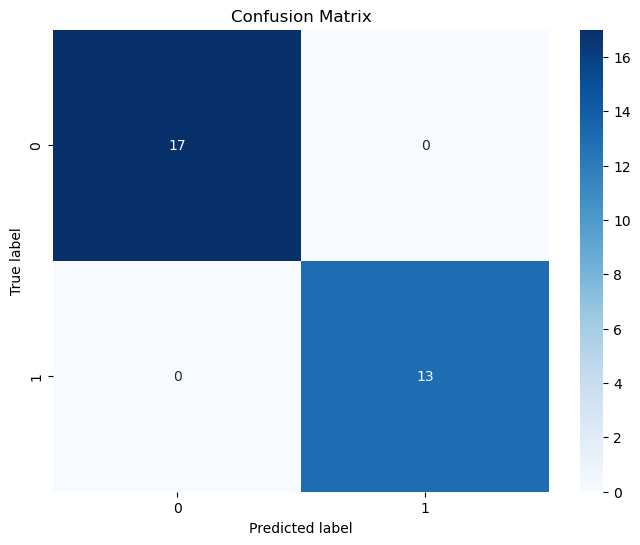

In [19]:

# Generate a confusion matrix to evaluate the performance of the classification
# Confusion matrix provides insights into correct and incorrect predictions
cm = confusion_matrix(y_test, predictions)
# Plot the confusion matrix using seaborn for better visualization
# 'fmt="d"' formats the values as integers
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



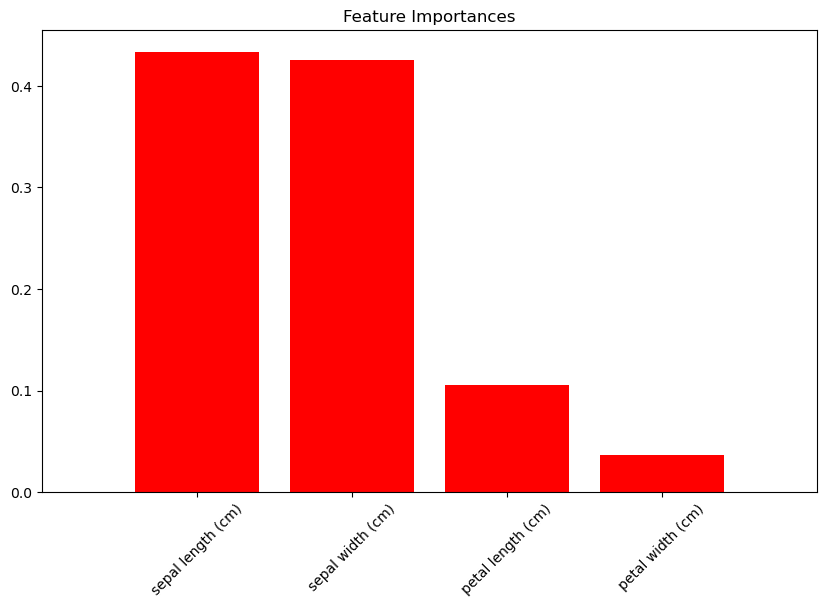

In [20]:
# Analyze feature importances determined by the Random Forest model
feature_importances = clf.feature_importances_
# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
# Plot the feature importances
# This graph shows which features are most important in the model's decision-making
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
# Set the x-ticks to correspond to the feature names, rotating them for better readability
plt.xticks(range(X.shape[1]), iris.feature_names, rotation=45)
# Set the limits of the x-axis
plt.xlim([-1, X.shape[1]])
plt.show()